# Workshop 5 Drill
This drill aims to give you an opportunity to practice deep learning on an interesting problem. 

For this drill, we will use PyTorch to build our deep learning architecture

## What are we solving today?
For this drill, we will be using the Fashion MNIST dataset to classify fashion images. 

Link for more information: https://github.com/zalandoresearch/fashion-mnist

This dataset is a classic dataset that is used to benchmark deep architectures. 

In [ ]:
#imports 
from torchvision import datasets, transforms


import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# your python files imported
import load_dataset 
import trainer
import model

## Step 1: Load in the dataset

Before we can do anything, we need to be able to load in the Fashion MNIST dataset. Luckily, the `datasets` library within the `torchvision` package contains the Fashion MNIST dataset. Load in both the train and test datasets. You also are able to specify the transformation to apply to both the train and test sets. Fill out the `load_dataset.py` file. 

In [ ]:
# Test that your implementation from load_dataset.py works
trainloader, testloader = load_dataset.load_fashion_mnist()

# Examine a sample
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

NameError: name 'load_dataset' is not defined

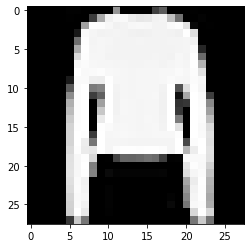

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

## Step 2: Build the Model
Now that we are able to load in the Fashion MNIST as torch Dataloaders, we get to the fun part!

We can now construct a deep learning model that can be used to classify images of fashion objects. 

In `model.py`, you will build the architecture shown below (in the `MyBasicModel` class). Convolutional Neural Networks are very popular for image classification 
![Fashion MNIST Image](dl_arch.PNG) (Credit: https://towardsdatascience.com/build-a-fashion-mnist-cnn-pytorch-style-efb297e22582)



Hint: Linear layers might be helpful for you to build the architecture

In [ ]:
# Test Basic model
basic_model = model.MyBasicModel()
print(repr(basic_model)) #check that your architecture matches up to the diagram

MyBasicModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


## Step 3: Train the model
Use `trainer.py` to fill in the function to train your deep learning model. You will need to configure the following:

* Loss Function: CELoss
* Optimizer: Adam
* Epoch count: 30


In [ ]:
# Use Pytorch to configure the loss function, optimizer, epoch count

loss_function = __________________
optimizer = __________________
epochs = __________________

In [ ]:
results = trainer.run_dl_model(trainloader, testloader, basic_model, optimizer,loss_function, epochs)
results

Epoch: 0
Train loss: 3703.12158203125
Test loss: 586.3130493164062
Train Accuracy: 76.47666666666667
Test Accuracy: 78.16
Epoch: 1
Train loss: 3212.3173828125
Test loss: 651.6744384765625
Train Accuracy: 80.46
Test Accuracy: 78.52
Epoch: 2
Train loss: 3113.3837890625
Test loss: 504.39794921875
Train Accuracy: 81.565
Test Accuracy: 82.1
Epoch: 3
Train loss: 3020.9892578125
Test loss: 607.5935668945312
Train Accuracy: 82.26833333333333
Test Accuracy: 81.36
Epoch: 4
Train loss: 3093.33349609375
Test loss: 576.538818359375
Train Accuracy: 82.06166666666667
Test Accuracy: 81.15
Epoch: 5
Train loss: 3020.01123046875
Test loss: 559.7905883789062
Train Accuracy: 82.38666666666667
Test Accuracy: 80.74


,Epoch,Train Loss,Test Loss,Train Accuracy,Test Accuracy
0,1,3703.1216,586.31305,76.476667,78.16
1,2,3212.3174,651.67444,80.460000,78.52
2,3,3113.3838,504.39795,81.565000,82.10
3,4,3020.9893,607.59357,82.268333,81.36
4,5,3093.3335,576.5388,82.061667,81.15
5,6,3020.0112,559.7906,82.386667,80.74


## Step 4: Having even more fun!
So, I gave you one of many possible CNN architectures to train your Fashion MNIST classifier. Another architecture you can try is a pretrained DL architecture called ResNet (Residual Neural Network). The key building block in ResNet is what's called a Basic Block. Below is an comparison of ResNet architecturse (which is what you will use in this exercise):
![Resnet](resnet.png)


For this part of the exercise, you will be using Resnet 50 architecture. However, you don't have to build it from scratch. Pytorch allows you to import a pretrained version of the architecture for your use. 

Check out: https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html#torchvision.models.resnet50

We can't just import resnet 50 and we're good. We have to tweak ResNet a bit for Fashion MNIST. Below are the fixes you should make:

* The Fashion MNIST uses gray-scale images, so you should take the `conv1` layer in resnet-50 and set `in_channels=1`

* The last layer in Resnet-50 is a fully connected layer (ie: `Linear` layer). We want to fix the last `Linear` layer in ResNet such that the output is a `1x10` vector (so you need to worry about `out_features` for the last `Linear` layer). 

Implement Resnet-50 for Fashion MNIST in `model.py` under the `FashionResNet50` class

In [ ]:
#check your resnet architecture
resnet_model = model.FashionResNet50()
print(resnet_model)

NameError: name 'model' is not defined

In [ ]:
#Enter optimizer, loss function, epochs for resnet
resnet_optimizer = __________________
resnet_loss_function = __________________
resnet_epochs = __________________

In [ ]:
#train resnet model (this part can take a while, so run this trainer using CUDA (torch.cuda())!)
results = trainer.run_dl_model(trainloader, testloader, resnet_model, resnet_optimizer, resnet_loss_function, resnet_epochs)
results

KeyboardInterrupt: 

Feel free to play around with parameters for optimizer, loss function, epochs for resnet and basic CNN model. For basic CNN model, you can play around with the layer parameters and architecture. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8488eaf2-ff92-4a43-b350-fdb8e01ce644' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>